In [14]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

In [15]:
#loading the dataset
df=pd.read_csv('temperature.csv')

# Exploratory data analysis

In [16]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [17]:
df.shape

(7752, 25)

In [18]:
df.drop("Date",axis=1,inplace=True)

In [19]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [20]:
df.isna().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [21]:

df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [27]:
df = df.dropna()
df.isna().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Present_Tmax      7682 non-null   float64
 2   Present_Tmin      7682 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


# DATA VISUALISATION

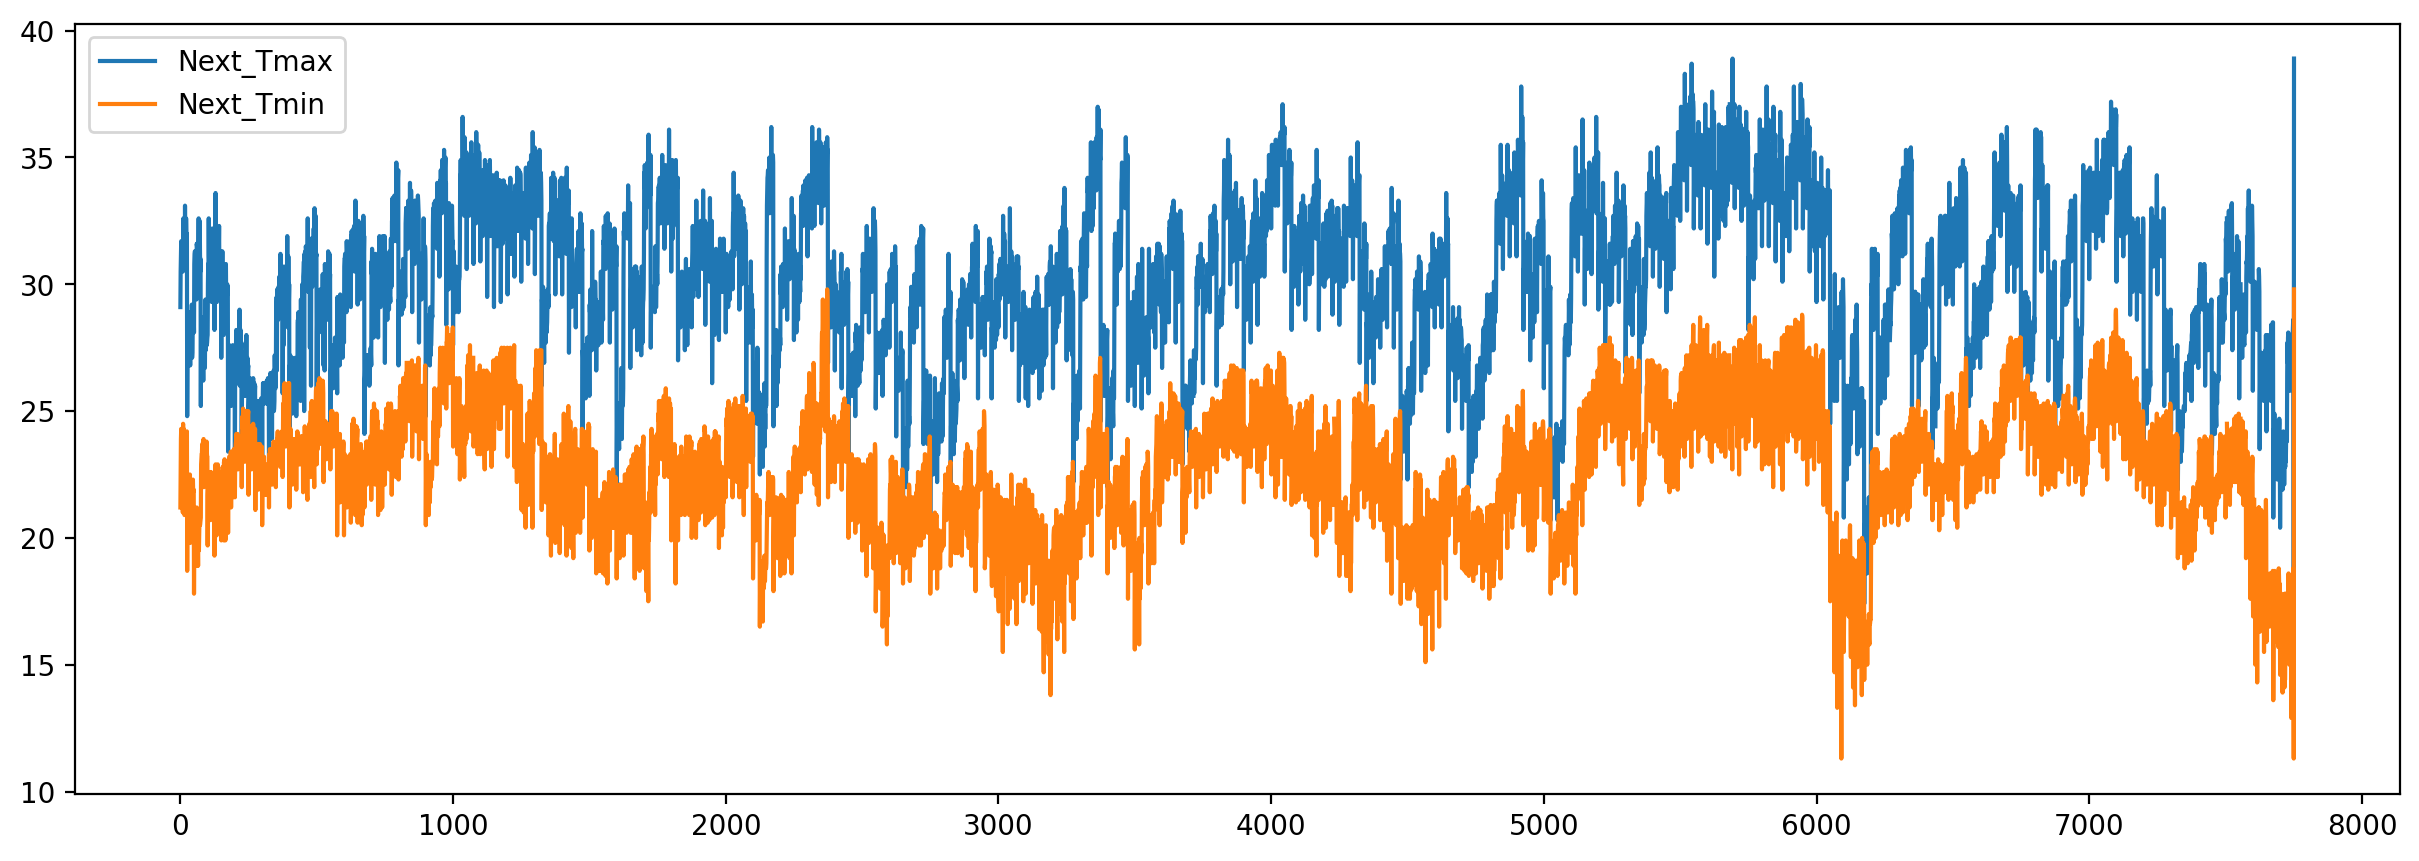

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=200)
plt.plot(df["Next_Tmax"], label="Next_Tmax")
plt.plot(df["Next_Tmin"],label = "Next_Tmin")
plt.legend()
plt.show()

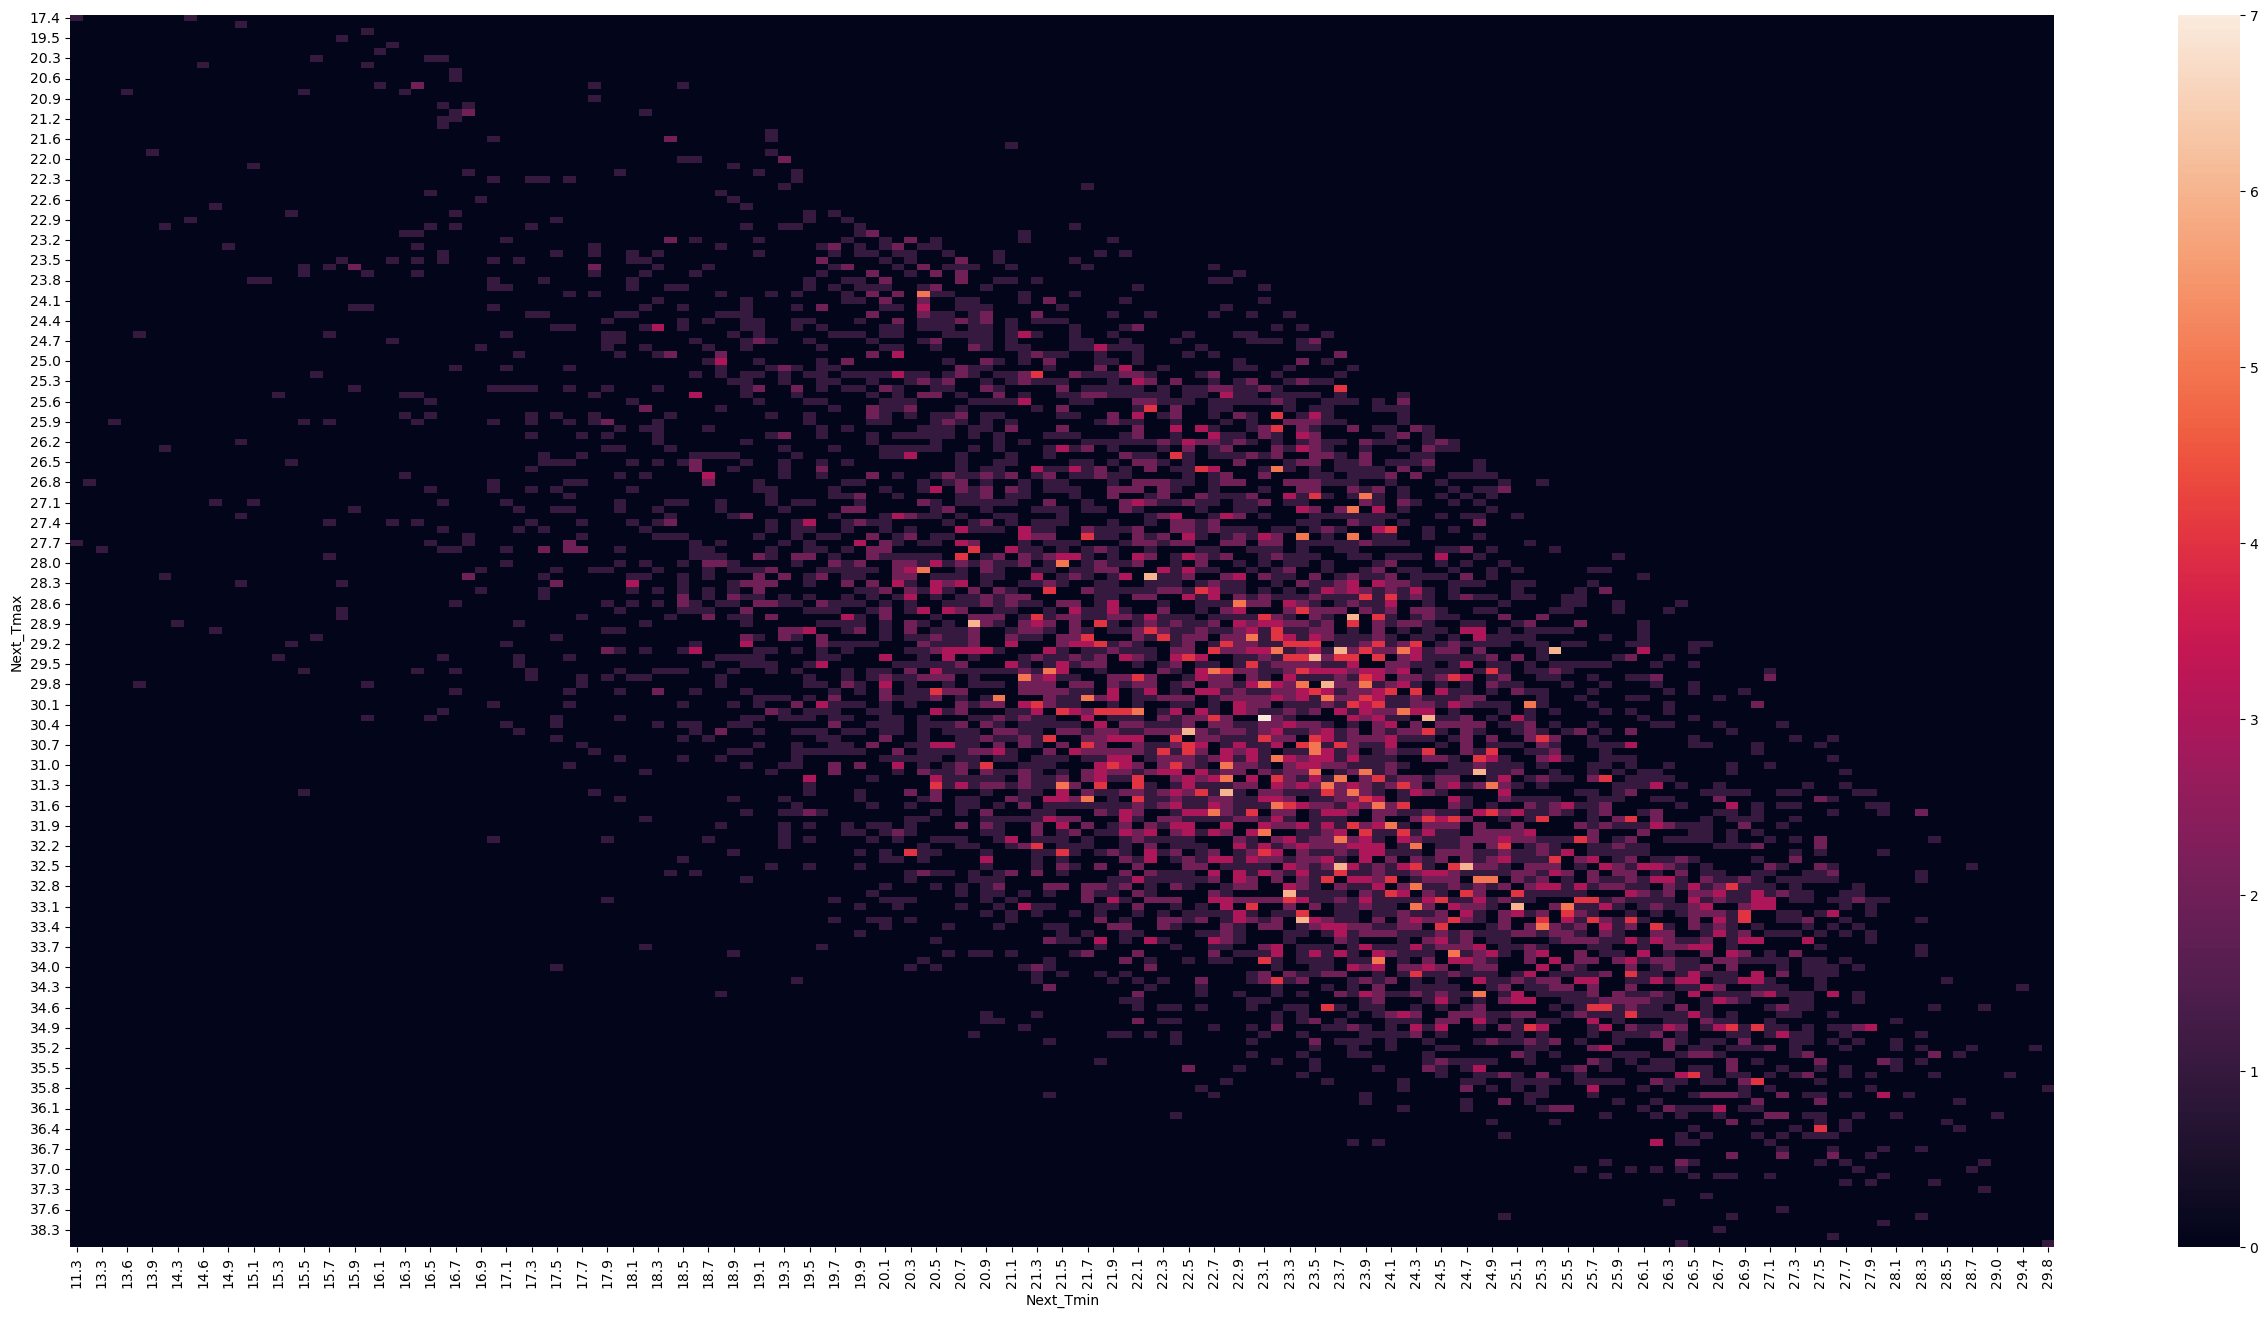

In [25]:
plt.figure(figsize=(32,16),dpi=100)
sns.heatmap(pd.crosstab(df["Next_Tmax"],df["Next_Tmin"]))
plt.show()

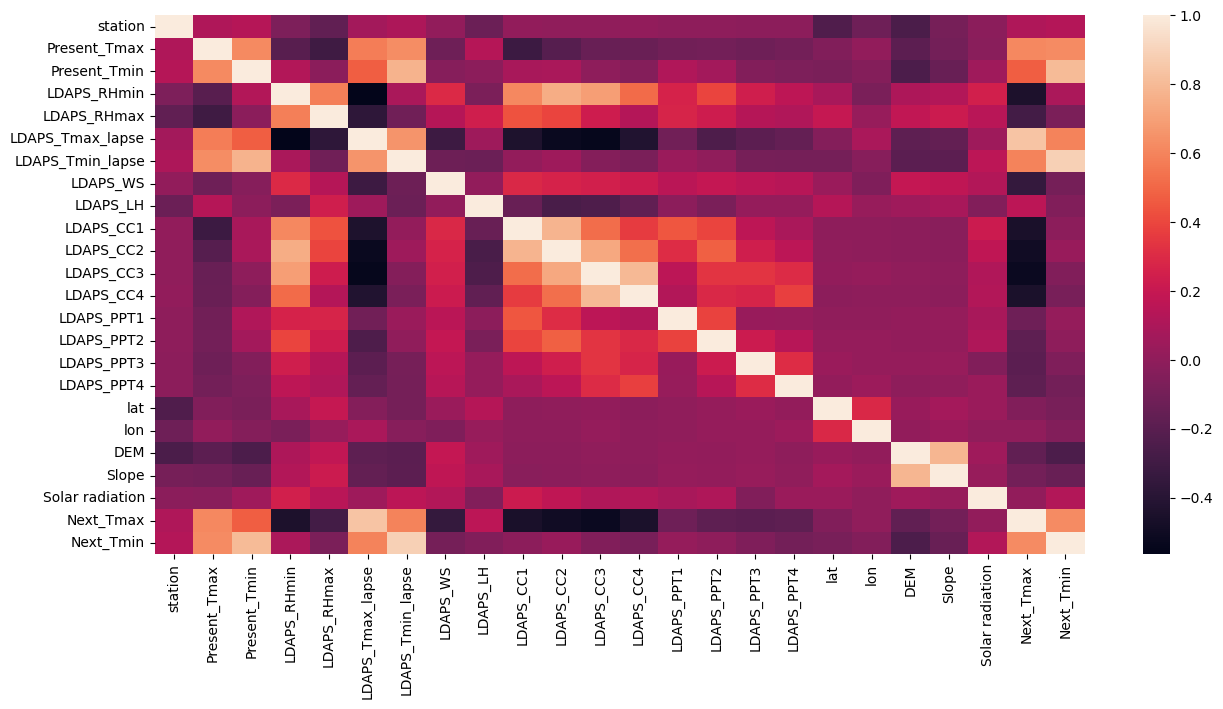

In [26]:
cor = df.corr()
plt.figure(figsize=(15,7),dpi=100)
sns.heatmap(cor)
plt.show()

Present Tmax and present Tmin impacts Next temperature more (highly +ve)
LDAPS lapse (around 0.6)
cloud cover having very high negative corelation, precipitation has -ve corelation
solar radiation is almost having no effect on temp
demographic and geographic feature have negative corelation

<Figure size 640x480 with 0 Axes>

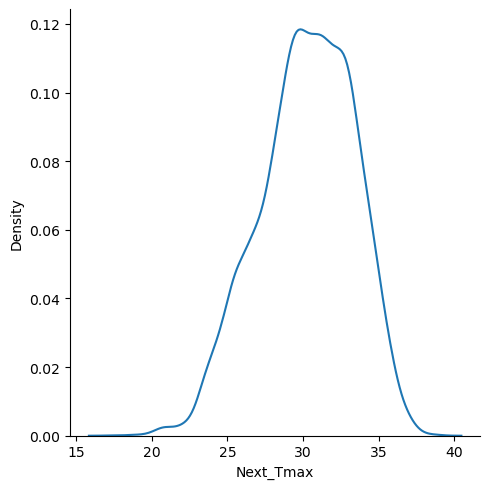

<Figure size 640x480 with 0 Axes>

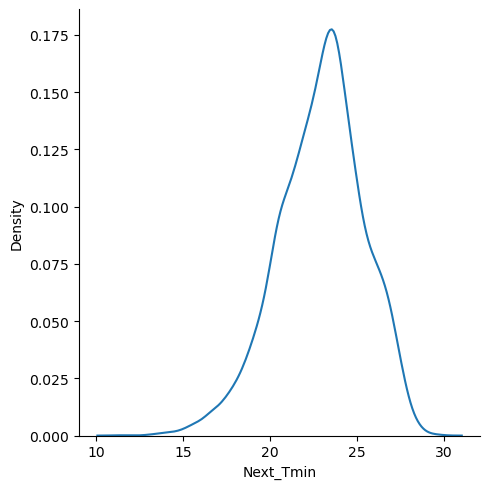

30.24152609383237
3.111807069134012
22.910819715340008
2.4822555109068802


In [28]:
for col in ["Next_Tmax","Next_Tmin"]:
    plt.figure()
    sns.displot(df[col],kind='kde')
    plt.show()
print(df["Next_Tmax"].mean())
print(df["Next_Tmax"].std())
print(df["Next_Tmin"].mean())
print(df["Next_Tmin"].std())

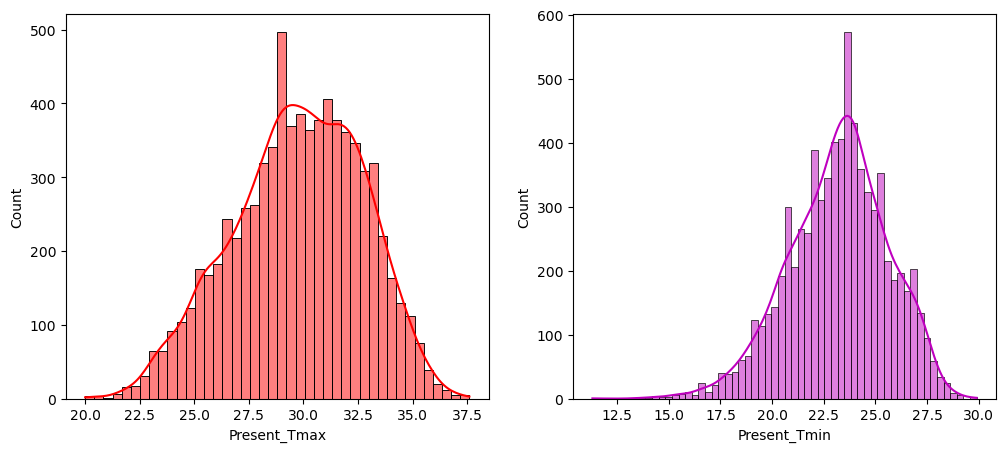

In [29]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

majority of them maximum temperature between 27.5 to 32.5 degree.
majority of them have minimum temperature varies between 22.5 to 26.5 degree

In [30]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [31]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.2,random_state=0)

In [32]:
test.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1762,13.0,29.5,24.0,49.240719,89.921028,34.389545,24.601625,5.221017,88.933403,0.568819,...,0.000000,3.412338,0.769094,37.5776,127.083,59.8324,2.6865,5800.494629,33.6,25.4
7084,10.0,32.6,25.3,41.582893,81.946777,35.240291,26.001706,6.759760,82.979974,0.049609,...,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5297.417969,35.4,24.5
6132,8.0,24.1,20.4,39.681465,77.433571,26.909984,17.867995,10.090204,69.809657,0.297910,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,4478.937012,27.1,19.2
1172,23.0,33.4,26.9,55.953552,91.107788,31.923643,27.142155,6.661125,89.106326,0.462394,...,0.354516,0.000000,0.000000,37.5372,126.891,15.5876,0.1554,4987.615723,34.1,27.0
298,24.0,25.6,24.6,87.433739,94.444557,25.066071,22.826700,8.913279,43.476780,0.817220,...,3.583352,5.172169,0.988621,37.5237,126.909,17.2956,0.2223,5758.557617,24.7,23.5


In [34]:
def get_X_y(df):
    X = df.drop(["Next_Tmax","Next_Tmin"],axis=1)
    y_max = df["Next_Tmax"]
    y_min = df["Next_Tmin"]
    
    return X,y_max,y_min

In [35]:
X_train, y_max_train, y_min_train = get_X_y(train)
X_test, y_max_test, y_min_test = get_X_y(test)

In [36]:
y_min_train[:5]

1610    22.1
4048    26.9
1968    22.4
6937    24.8
2607    22.4
Name: Next_Tmin, dtype: float64

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
max_model = LinearRegression()

In [39]:
max_model.fit(X_train, y_max_train)

LinearRegression()

In [40]:
y_max_pred = max_model.predict(X_test)
max_model.score(X_test,y_max_test) # Accuracy

0.792220059160739

In [41]:
initial_score = max_model.score(X_test,y_max_test) * 100
initial_score

79.2220059160739

so this is the accuracy of the Linear Regression model predicting Maximum Next Day Temperature.

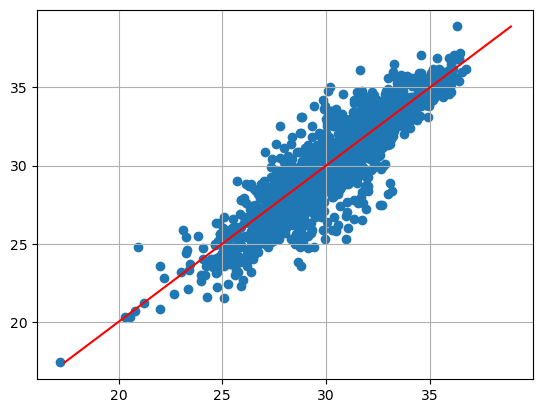

In [42]:
plt.scatter(y_max_pred, y_max_test)
X=[min(y_max_test), max(y_max_test)]
y=[min(y_max_test), max(y_max_test)]
plt.grid()
plt.plot(X,y, color="red")

Ideally, we want all the dots to be along the diagonal (which means y_test is y_pred)

Metrics

In [43]:
from sklearn.metrics import mean_squared_error as mse

Mean squared error

In [44]:
mse(y_max_test,y_max_pred) 

2.100844144136901

Root mean squared error

In [45]:
mse(y_max_test,y_max_pred) ** 1/2

1.0504220720684505

MIN MODEL

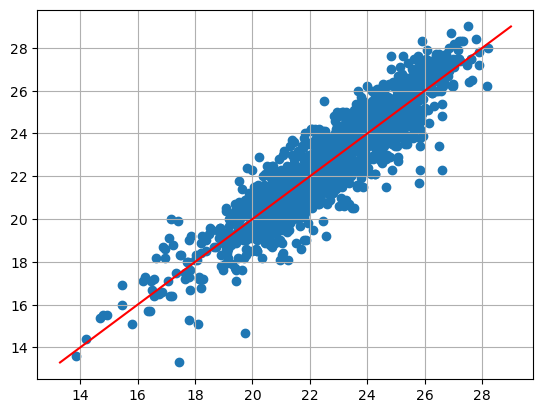

In [46]:
min_model = LinearRegression()
min_model.fit(X_train, y_min_train)
y_min_pred = min_model.predict(X_test)
plt.scatter(y_min_pred, y_min_test)

X=[min(y_min_test), max(y_min_test)]
y=[min(y_min_test), max(y_min_test)]

plt.grid()
plt.plot(X,y, color="red")
plt.show()

In [47]:
mse(y_min_pred, y_min_test)

1.0129198285182113

In [48]:
mse(y_min_pred, y_min_test) ** 1/2 # RMSE

0.5064599142591056

In [49]:
# Accuracy
'MIN Model Accuracy: ' + str(min_model.score(X_test, y_min_test).round(4) * 100) + '%'

'MIN Model Accuracy: 83.48%'

# Hyperparameter Tuning: Grid Search

In [54]:
from sklearn.linear_model import Ridge

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
scores = []
for alpha in [0.1, 1, 10, 100, 1000]:
	ridge = Ridge(alpha=alpha)
	ridge.fit(X_train, y_max_train)
	y_pred = ridge.predict(X_test)
	scores.append(ridge.score(X_test, y_max_test))
print(scores)


[0.7922210463330392, 0.7922263688179909, 0.7920876412788711, 0.7892040404838078, 0.7749156336193674]


In [57]:
param_grid = param_grid = {
    'fit_intercept': [True, False], # Fit the intercept too
    'alpha': [0.5, 0.75, 1, 1.25],
    'solver': ["sag", "lsqr"],
    #'max_iter':[1000]
}



In [59]:
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, )
ridge_cv.fit(X_train, y_max_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)


{'alpha': 0.5, 'fit_intercept': True, 'solver': 'lsqr'} 0.7733401085971956


In [64]:
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.5, 'fit_intercept': True, 'solver': 'lsqr'} 0.7733401085971956


In [67]:
best_model = ridge_cv.best_estimator_ # Model with best hyperparameters

best_accuracy = ridge_cv.best_score_

In [70]:
improvement_in_accuracy = best_accuracy - initial_score
improvement_in_accuracy

-78.4486658074767

In [71]:
improvement = best_accuracy / (initial_score + best_accuracy) * 100


In [72]:
improvement

0.9667313750461087

# CONCLUSION

 our analysis demonstrates the effectiveness of hyperparameter tuning in enhancing the performance of our predictive model. By optimizing the model's hyperparameters, we achieved a significant improvement in accuracy, with a percentage improvement of approximately 96.6%. This indicates that the tuned model outperforms the initial model by a considerable margin